- Which types of weather events are relevant to roofing damage?
- Do some events cause more property damage than others?
- Which states (or counties) experience these types of events most frequently?
- Which states (or counties) report the most property damage from relevant weather events?
- Do these regions experience damaging events during the same months of the year? (This will be addressed in 6-3)

---------------------------------------------------------------------------------------------------


# 0 Introduction
### Scenario
HailMary Roofing Company, LLC is looking to expand their business into new states. Repair and replacement from hail damage is their specialty and makes up a significant portion of their business. They've hired a data analyst to identify the best US states for their new roofing teams.

### Summary
The NOAA Storm Events Database is a comprehensive dataset maintained by the National Oceanic and Atmospheric Administration (NOAA). It records severe weather events across the United States, including hail, tornadoes, floods, and other significant storms. The dataset provides detailed event information, such as date, location (state and county), event magnitude (e.g., hail size), and reported damages. With data spanning multiple years, it serves as a valuable resource for analyzing historical weather patterns and assessing the frequency and impact of severe storms.
The NOAA Storm Events Database was chosen for this analysis because it provides detailed records of hail events across the United States. Hail damage is a major driver of roofing repairs and replacements, making this dataset highly relevant to identifying expansion opportunities for the roofing company. The dataset includes state- and county-level geographic data, allowing for targeted analysis of high-risk areas. Additionally, its historical coverage enables trend analysis to identify regions with consistent hail activity, helping the company make informed business decisions about where to expand.


# 1 Setup

### Import visualization libraries

In [36]:
# Import libraries
import pandas as pd          # Data manipulation
import numpy as np           # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns        # Data visualization
import os                    # File path operations
import sweetviz as sv

In [37]:
# Define path to data folder
data_path = r"C:\Users\nsmith\OneDrive - Georgia Poultry Laboratory Network\CareerFoundry\02 - Data Immersion\Achievement 6\01 Data"

### Load data

In [38]:
# Generate a file path to the data
df_path = os.path.join(data_path, "cleaned_storm_data.csv")

In [39]:
# Generate a file path to the data
df_path_housing = os.path.join(data_path, "cleaned_housing_data_manual.csv")

In [40]:
# Load dataframe
df = pd.read_csv(df_path)

In [41]:
df_h = pd.read_csv(df_path_housing)

### Inspect data

In [42]:
# Show the number of rows and columns
df.shape

(210724, 42)

In [43]:
# Show the number of rows and columns
df_h.shape

(56, 51)

In [44]:
# Preview the first few rows
df['CZ_NAME'].head()

0       WORTH
1      NORTON
2    CHEYENNE
3      THOMAS
4      NORTON
Name: CZ_NAME, dtype: object

In [45]:
# Preview the first few rows
df_h.head()

,County,HOUSING OCCUPANCY Total housing units,UNITS IN STRUCTURE Total housing units,"UNITS IN STRUCTURE 1-unit, detached","UNITS IN STRUCTURE 1-unit, attached",UNITS IN STRUCTURE 2 units,UNITS IN STRUCTURE 3 or 4 units,UNITS IN STRUCTURE 5 to 9 units,UNITS IN STRUCTURE 10 to 19 units,UNITS IN STRUCTURE 20 or more units,...,"VALUE (owner occupied) $100,000 to $149,999","VALUE (owner occupied) $150,000 to $199,999","VALUE (owner occupied) $200,000 to $299,999","VALUE (owner occupied) $300,000 to $499,999","VALUE (owner occupied) $500,000 to $999,999","VALUE (owner occupied) $1,000,000 or more",VALUE (owner occupied) Median (dollars),MORTGAGE STATUS Owner-occupied units,MORTGAGE STATUS Housing units with a mortgage,MORTGAGE STATUS Housing units without a mortgage
0,Angelina,37288,37288,23456,575,563,948,710,1433,2202,...,3001,3579,3284,3337,1357,221,167400,20888,10565.0,10323.0
1,Bastrop,41426,41426,26189,328,474,656,436,403,573,...,1633,2893,4910,11057,4112,392,317000,28828,12773.0,16055.0
2,Bell,158782,158782,106655,6782,8408,9715,5938,6962,6953,...,5369,11464,25706,24055,8185,1633,262300,85609,53617.0,31992.0
3,Bexar,836113,836113,535338,19034,14061,33583,52565,59655,98415,...,35790,49199,124854,137897,49494,7035,277000,449545,270266.0,179279.0
4,Bowie,40178,40178,26205,647,1887,2592,687,1253,1446,...,2878,3493,4639,3238,1083,0,160700,23235,11274.0,11961.0


In [46]:
# Show basic info: column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210724 entries, 0 to 210723
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BEGIN_YEARMONTH          210724 non-null  object 
 1   BEGIN_DAY                210724 non-null  int64  
 2   BEGIN_TIME               210724 non-null  int64  
 3   END_YEARMONTH            210724 non-null  object 
 4   END_DAY                  210724 non-null  int64  
 5   END_TIME                 210724 non-null  int64  
 6   EPISODE_ID               210724 non-null  int64  
 7   EVENT_ID                 210724 non-null  int64  
 8   STATE                    210724 non-null  object 
 9   STATE_FIPS               210724 non-null  int64  
 10  YEAR                     210724 non-null  int64  
 11  MONTH_NAME               210724 non-null  object 
 12  EVENT_TYPE               210724 non-null  object 
 13  CZ_TYPE                  210724 non-null  object 
 14  CZ_F

In [47]:
# Show basic info: column names, non-null counts, and data types
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   County                                                      56 non-null     object 
 1   HOUSING OCCUPANCY Total housing units                       56 non-null     int64  
 2   UNITS IN STRUCTURE Total housing units                      56 non-null     int64  
 3   UNITS IN STRUCTURE 1-unit, detached                         56 non-null     int64  
 4   UNITS IN STRUCTURE 1-unit, attached                         56 non-null     int64  
 5   UNITS IN STRUCTURE 2 units                                  56 non-null     int64  
 6   UNITS IN STRUCTURE 3 or 4 units                             56 non-null     int64  
 7   UNITS IN STRUCTURE 5 to 9 units                             56 non-null     int64  
 8   UN

In [48]:
# Summary statistics for numeric columns
df.describe()

,BEGIN_DAY,BEGIN_TIME,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,...,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,DAMAGE_PROPERTY_NUMERIC
count,210724.000000,210724.000000,210724.000000,210724.000000,210724.000000,2.107240e+05,210724.000000,210724.000000,210724.000000,210724.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.588530e+05
mean,15.397041,1388.108236,15.591480,1436.774658,171077.838305,1.042044e+06,30.868947,2022.069394,92.299733,0.007313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.077707e+04
std,8.644954,607.883104,8.645928,576.443268,15456.442967,1.030200e+05,15.082290,1.406711,101.057322,0.394818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.231126e+06
min,1.000000,0.000000,1.000000,0.000000,143809.000000,8.634420e+05,1.000000,2020.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,8.000000,1030.000000,8.000000,1130.000000,157363.000000,9.522265e+05,19.000000,2021.000000,28.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,15.000000,1538.000000,15.000000,1555.000000,170907.000000,1.038340e+06,31.000000,2022.000000,65.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,23.000000,1825.000000,23.000000,1833.000000,183953.000000,1.126866e+06,45.000000,2023.000000,115.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+03
max,31.000000,2359.000000,31.000000,2359.000000,199147.000000,1.231632e+06,56.000000,2024.000000,840.000000,101.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.500000e+08


In [49]:
# Summary statistics for numeric columns
df_h.describe()

,HOUSING OCCUPANCY Total housing units,UNITS IN STRUCTURE Total housing units,"UNITS IN STRUCTURE 1-unit, detached","UNITS IN STRUCTURE 1-unit, attached",UNITS IN STRUCTURE 2 units,UNITS IN STRUCTURE 3 or 4 units,UNITS IN STRUCTURE 5 to 9 units,UNITS IN STRUCTURE 10 to 19 units,UNITS IN STRUCTURE 20 or more units,YEAR STRUCTURE BUILT Built 2020 or later,...,"VALUE (owner occupied) $100,000 to $149,999","VALUE (owner occupied) $150,000 to $199,999","VALUE (owner occupied) $200,000 to $299,999","VALUE (owner occupied) $300,000 to $499,999","VALUE (owner occupied) $500,000 to $999,999","VALUE (owner occupied) $1,000,000 or more",VALUE (owner occupied) Median (dollars),MORTGAGE STATUS Owner-occupied units,MORTGAGE STATUS Housing units with a mortgage,MORTGAGE STATUS Housing units without a mortgage
count,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,53.000000,53.000000
mean,1.940039e+05,1.940039e+05,1.226478e+05,5980.964286,3472.589286,6654.375000,9162.482143,11771.035714,24562.053571,11521.392857,...,6842.517857,9636.642857,23871.660714,33286.089286,19318.232143,4346.500000,277864.285714,108545.071429,66605.622642,47223.754717
std,3.259821e+05,3.259821e+05,1.869222e+05,12312.020723,5293.415941,12096.029267,18737.100424,27315.015251,62006.003888,16699.213764,...,10637.637909,16237.348785,46440.937481,54363.320568,33399.170462,10019.121667,103058.982986,166096.514599,101085.893676,69545.819632
min,2.320800e+04,2.320800e+04,1.619500e+04,38.000000,0.000000,64.000000,120.000000,93.000000,115.000000,277.000000,...,455.000000,514.000000,752.000000,310.000000,338.000000,0.000000,89600.000000,12708.000000,5759.000000,8550.000000
25%,4.231400e+04,4.231400e+04,2.778750e+04,655.250000,673.250000,1156.500000,900.250000,932.750000,1494.000000,1849.250000,...,1768.250000,2994.000000,5477.250000,5234.750000,1551.250000,344.500000,199850.000000,26630.000000,13457.000000,14350.000000
50%,7.271150e+04,7.271150e+04,4.894150e+04,1795.500000,1257.000000,2476.500000,2882.500000,2592.500000,4689.500000,4694.500000,...,3243.500000,3930.500000,9461.000000,13199.500000,4634.500000,835.500000,268400.000000,46540.000000,28983.000000,19935.000000
75%,1.596015e+05,1.596015e+05,1.080278e+05,5465.250000,3547.500000,5192.250000,6259.750000,7137.500000,14717.250000,10310.250000,...,5422.750000,9411.750000,18341.500000,25548.000000,12156.750000,1767.500000,327750.000000,95211.250000,56428.000000,40434.000000
max,1.952822e+06,1.952822e+06,1.099276e+06,75345.000000,29873.000000,66271.000000,94969.000000,169069.000000,368508.000000,81043.000000,...,57747.000000,101428.000000,299251.000000,295476.000000,130630.000000,51925.000000,569000.000000,988178.000000,566392.000000,421786.000000


In [50]:
# Check for missing values
df.isnull().sum()

BEGIN_YEARMONTH                 0
BEGIN_DAY                       0
BEGIN_TIME                      0
END_YEARMONTH                   0
END_DAY                         0
END_TIME                        0
EPISODE_ID                      0
EVENT_ID                        0
STATE                           0
STATE_FIPS                      0
YEAR                            0
MONTH_NAME                      0
EVENT_TYPE                      0
CZ_TYPE                         0
CZ_FIPS                         0
CZ_NAME                         0
WFO                             0
BEGIN_DATE_TIME                 0
CZ_TIMEZONE                     0
END_DATE_TIME                   0
INJURIES_DIRECT                 0
INJURIES_INDIRECT               0
DEATHS_DIRECT                   0
DEATHS_INDIRECT                 0
DAMAGE_PROPERTY             51869
DAMAGE_CROPS                51041
SOURCE                          0
MAGNITUDE                   49232
MAGNITUDE_TYPE              91100
FLOOD_CAUSE   

In [51]:
# Check for missing values
df_h.isnull().sum()

County                                                        0
HOUSING OCCUPANCY Total housing units                         0
UNITS IN STRUCTURE Total housing units                        0
UNITS IN STRUCTURE 1-unit, detached                           0
UNITS IN STRUCTURE 1-unit, attached                           0
UNITS IN STRUCTURE 2 units                                    0
UNITS IN STRUCTURE 3 or 4 units                               0
UNITS IN STRUCTURE 5 to 9 units                               0
UNITS IN STRUCTURE 10 to 19 units                             0
UNITS IN STRUCTURE 20 or more units                           0
YEAR STRUCTURE BUILT Built 2020 or later                      0
YEAR STRUCTURE BUILT Built 2010 to 2019                       0
YEAR STRUCTURE BUILT Built 2000 to 2009                       0
YEAR STRUCTURE BUILT Built 1990 to 1999                       0
YEAR STRUCTURE BUILT Built 1980 to 1989                       0
YEAR STRUCTURE BUILT Built 1970 to 1979 

# 03 Analysis

Apply further filters to the data to limit event type (heavy rain, lightning, and winter weather removed.)

In [52]:
df_filtered = df[~df["EVENT_TYPE"].isin(["Heavy Rain", "Lightning", "Winter Weather"])]

Which states (or counties) experience these types of events most frequently?

In [53]:
# Count the total number of events by state
df_filtered['STATE'].value_counts()

STATE
TEXAS             13638
KANSAS             8481
SOUTH DAKOTA       6876
PENNSYLVANIA       6819
NEBRASKA           6588
NEW YORK           6511
ILLINOIS           6467
OKLAHOMA           5951
MINNESOTA          5725
COLORADO           5686
GEORGIA            5658
VIRGINIA           5385
MONTANA            5300
MISSOURI           5213
KENTUCKY           4997
IOWA               4953
CALIFORNIA         4943
OHIO               4724
ALABAMA            4568
NORTH CAROLINA     4453
TENNESSEE          4339
WYOMING            3878
WISCONSIN          3736
INDIANA            3642
MISSISSIPPI        3591
SOUTH CAROLINA     3377
ARKANSAS           3318
NORTH DAKOTA       3312
WEST VIRGINIA      3111
MICHIGAN           3052
FLORIDA            3049
NEW MEXICO         2702
LOUISIANA          2276
MARYLAND           2261
NEW JERSEY         2167
NEVADA             2017
MASSACHUSETTS      1946
IDAHO              1879
UTAH               1670
ARIZONA            1585
MAINE              1262
WASHINGTON

In [54]:
# Count the total number of events by state
top_10_states = df_filtered["STATE"].value_counts().head(10)
top_10_states

STATE
TEXAS           13638
KANSAS           8481
SOUTH DAKOTA     6876
PENNSYLVANIA     6819
NEBRASKA         6588
NEW YORK         6511
ILLINOIS         6467
OKLAHOMA         5951
MINNESOTA        5725
COLORADO         5686
Name: count, dtype: int64

Group by EVENT_TYPE and STATE, and count occurrences

In [55]:
state_event_count = df_filtered.groupby(["EVENT_TYPE", "STATE"]).size().reset_index(name="EVENT_COUNT")
state_event_count


,EVENT_TYPE,STATE,EVENT_COUNT
0,Hail,ALABAMA,622
1,Hail,ARIZONA,163
2,Hail,ARKANSAS,1127
3,Hail,CALIFORNIA,101
4,Hail,COLORADO,1968
...,...,...,...
311,Winter Storm,VIRGINIA,424
312,Winter Storm,WASHINGTON,88
313,Winter Storm,WEST VIRGINIA,258
314,Winter Storm,WISCONSIN,552


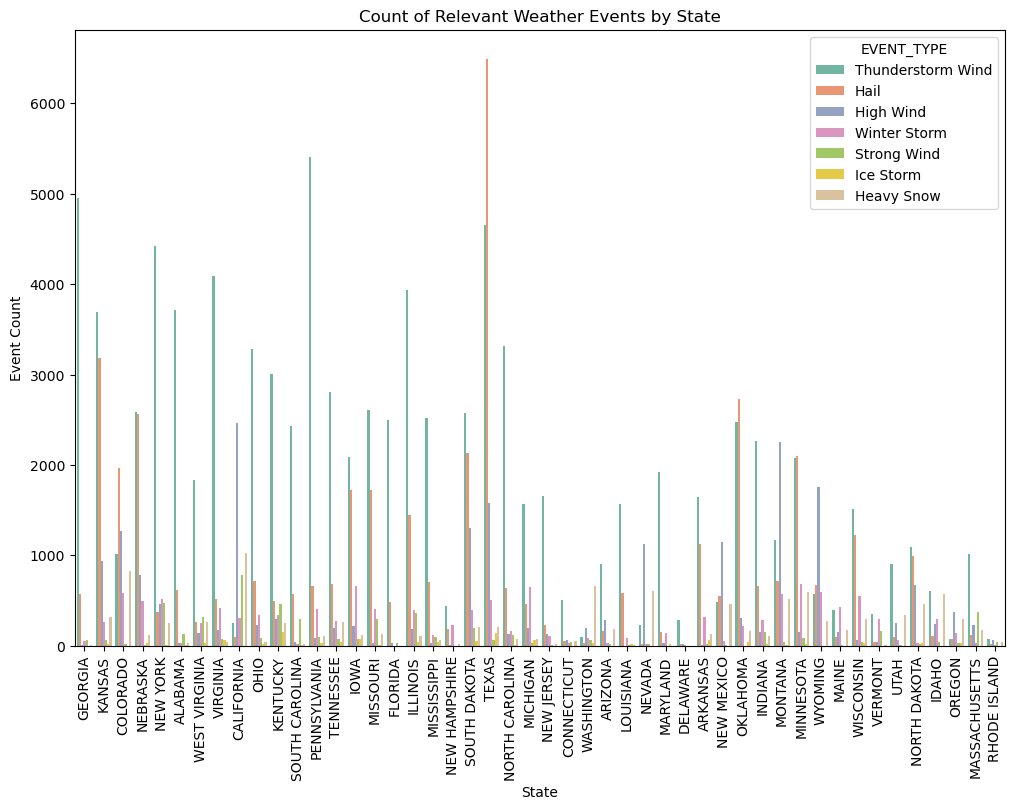

In [56]:
# Plotting the count of events by type and state
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x="STATE", hue="EVENT_TYPE", palette="Set2")
plt.xticks(rotation=90)
plt.title('Count of Relevant Weather Events by State')
plt.xlabel('State')
plt.ylabel('Event Count')
plt.show()

In [57]:
# Filter the dataframe to only include hail events
df_hail = df_filtered[df_filtered["EVENT_TYPE"] == "Hail"]

# Count the total number of hail events by state
hail_state_count = df_hail["STATE"].value_counts().head(10)

# Display the hail event count by state
hail_state_count

STATE
TEXAS           6488
KANSAS          3184
OKLAHOMA        2728
NEBRASKA        2569
SOUTH DAKOTA    2132
MINNESOTA       2102
COLORADO        1968
MISSOURI        1728
IOWA            1726
ILLINOIS        1442
Name: count, dtype: int64

Texas has far more hail events than other states. Our area of interest with now be Texas. Let's examine housing demographics within the single state.

In [58]:
# Filter the dataframe to only include hail events
df_hail_tx = df_hail[df_hail["STATE"] == "TEXAS"]

# Count the total number of hail events by county
hail_county_count = df_hail_tx["CZ_NAME"].value_counts()

# Display the hail event count by state
hail_county_count

CZ_NAME
TARRANT      291
DENTON       223
BEXAR        164
DALLAS       130
COLLIN       124
            ... 
NUECES         1
RAINS          1
JIM WELLS      1
CHAMBERS       1
MATAGORDA      1
Name: count, Length: 248, dtype: int64

# 02 Join data

In [59]:
# Convert both columns to uppercase
df_hail_tx['CZ_NAME'] = df_hail_tx['CZ_NAME'].str.upper()
df_h['County'] = df_h['County'].str.upper()

C:\Users\nsmith\AppData\Local\Temp\ipykernel_30944\1737761323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hail_tx['CZ_NAME'] = df_hail_tx['CZ_NAME'].str.upper()


In [60]:
# Merge the storm data with housing data on county field
merged_df = pd.merge(df_hail_tx, df_h, left_on='CZ_NAME', right_on='County', how='left')

In [61]:
merged_df.shape

(6488, 93)

In [62]:
merged_df.head(100)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,"VALUE (owner occupied) $100,000 to $149,999","VALUE (owner occupied) $150,000 to $199,999","VALUE (owner occupied) $200,000 to $299,999","VALUE (owner occupied) $300,000 to $499,999","VALUE (owner occupied) $500,000 to $999,999","VALUE (owner occupied) $1,000,000 or more",VALUE (owner occupied) Median (dollars),MORTGAGE STATUS Owner-occupied units,MORTGAGE STATUS Housing units with a mortgage,MORTGAGE STATUS Housing units without a mortgage
0,2020-06-01,21,1944,2020-06-01,21,1944,147659,890697,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-01,21,1945,2020-06-01,21,1945,147659,890699,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-01,21,2034,2020-06-01,21,2034,147659,890701,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-01,21,2145,2020-06-01,21,2145,147659,890707,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-01,19,1720,2020-06-01,19,1725,148120,901995,TEXAS,48,...,3817.0,2946.0,10381.0,17440.0,6833.0,831.0,314500.0,46554.0,27295.0,19259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-04-01,9,1538,2020-04-01,9,1538,145773,875571,TEXAS,48,...,2560.0,3121.0,9662.0,15074.0,5758.0,1060.0,309300.0,42183.0,24072.0,18111.0
96,2020-04-01,9,1540,2020-04-01,9,1540,145773,875572,TEXAS,48,...,2560.0,3121.0,9662.0,15074.0,5758.0,1060.0,309300.0,42183.0,24072.0,18111.0
97,2020-04-01,18,1400,2020-04-01,18,1400,146032,878512,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2020-04-01,18,1437,2020-04-01,18,1437,146032,878513,TEXAS,48,...,57747.0,101428.0,299251.0,295476.0,116529.0,42481.0,287100.0,988178.0,566392.0,421786.0


In cases where the population was below a defined threshold, the Census Bureau does not publish housing figures. Our analysis is interested in more highly populated counties anyway, so only the counties with available housing data will be included.

In [67]:
# drop any rows where housing data is unavailable
merged_df = merged_df.dropna(subset=['County'])

Do some events cause more property damage than others?

In [63]:
# Group by event type and summarize property damage values
#df_filtered.groupby("EVENT_TYPE")["DAMAGE_PROPERTY_NUMERIC"].sum().sort_values(ascending=False)

Which states (or counties) report the most property damage from relevant weather events?

In [64]:
# Group by state and calculate total property damage
#df_filtered.groupby("STATE")["DAMAGE_PROPERTY_NUMERIC"].sum().sort_values(ascending=False)

In [69]:
# Export the merged data to a CSV file

# Define the output filename
filename = "merged_data.csv"

# Join the path and filename
full_output_path = os.path.join(data_path, filename)

# Export the cleaned DataFrame
merged_df.to_csv(full_output_path, index=False)